# Part 1: plotting simulation data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["font.size"] = 16

In [4]:
df = pd.read_csv("sp500.csv")
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


In [5]:
start = 1000
df["wealth"] = df["return"].cumprod() * start
df.head()

,year,return,wealth
0,1970,1.0401,1040.100000
1,1971,1.1431,1188.938310
2,1972,1.1898,1414.598801
3,1973,0.8534,1207.218617
4,1974,0.7353,887.667849


In [6]:
df = df.set_index("year")
df.head()

,return,wealth
year,,
1970,1.0401,1040.100000
1971,1.1431,1188.938310
1972,1.1898,1414.598801
1973,0.8534,1207.218617
1974,0.7353,887.667849


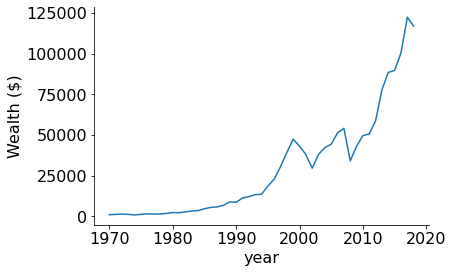

In [7]:
ax = df["wealth"].plot.line()
ax.set_ylabel("Wealth ($)")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

In [8]:
import random

In [9]:
random.choice([3,4,5])

4

In [10]:
random.choices([3,4,5], k=10)

[3, 4, 4, 4, 3, 3, 5, 4, 5, 3]

In [11]:
def sim_year(start=1000, years=10, init_year=2020):
    returns = pd.Series(random.choices(list(df["return"]), k=years),
                        index=range(init_year, init_year+years))
    return returns.cumprod() * start

sim_year(init_year=2021)

2021     630.000000
2022     749.574000
2023     765.390011
2024     741.662921
2025     718.671370
2026     686.834229
2027     795.285354
2028     920.860911
2029    1119.306437
2030    1474.462370
dtype: float64

In [12]:
def sim_many_years(sim_count=1):
    sims = pd.DataFrame()
    for i in range(sim_count):
        sims["sim"+str(i)] = sim_year(init_year=2021)
    return sims
results = sim_many_years(500)
results

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim490,sim491,sim492,sim493,sim494,sim495,sim496,sim497,sim498,sim499
2021,1166.100000,1316.900000,1186.700000,1325.000000,735.300000,1143.100000,735.300000,1166.100000,1136.900000,1150.600000,...,928.200000,1160.000000,1285.800000,1304.700000,969.000000,1054.900000,1375.800000,881.100000,955.700000,1286.800000
2022,1429.172160,1693.270020,1445.756610,1822.935000,968.610690,1572.676980,815.300640,1545.082500,1483.313430,1266.580480,...,1074.762780,1318.804000,1491.528000,1513.452000,1283.925000,1124.101440,1672.284900,927.357750,1070.001720,1567.708440
2023,1839.058735,2178.899862,1915.627508,2400.623101,1042.418825,1671.283827,877.426549,1662.817787,1265.859681,1345.995076,...,1021.884451,1736.732988,1917.806702,1741.377871,1691.314402,1147.819980,2037.344694,1103.370251,1472.108366,1221.244875
2024,1757.588434,2022.454852,1206.845330,3089.121807,1234.640856,1589.056662,1015.972201,1767.076462,1476.118974,1399.969479,...,1242.100550,1827.911469,1410.163268,2116.644802,2176.383373,1359.477985,2576.426100,972.179528,927.428271,1424.093648
2025,1703.103192,2299.328921,1153.382082,4250.013782,1251.678900,2044.798113,1029.383034,2172.797217,1721.302336,1468.707980,...,1474.000723,1696.667426,1347.693035,2506.954104,2881.313948,1656.252029,3393.926101,856.587382,881.798800,1751.065550
2026,2242.816594,2801.272424,1528.231259,4921.090958,1068.182773,2145.197700,1343.036044,2662.980270,1564.663823,1144.123516,...,1825.402496,1732.467109,1563.323921,3034.417247,3795.554863,2208.777706,4669.363530,1083.240404,1071.826441,1542.863856
2027,2549.858185,2714.432979,1873.000231,4703.086629,970.978141,2401.763345,1566.114331,2769.765778,1335.284107,1316.428518,...,1557.798490,2310.418136,1936.020344,2758.285278,4998.366199,2908.739361,6227.063203,1192.431036,1269.471237,1402.463245
2028,2436.899468,2751.892154,1948.107540,6226.416388,984.377639,2786.045481,1907.997090,2440.440627,1518.084501,1398.968586,...,2064.082999,2808.313244,2380.530615,3380.554437,5064.344633,3025.379809,5486.665388,1363.067918,1503.561733,883.551845
2029,3133.365336,2862.243030,1227.307750,7388.888328,766.830181,3205.623930,1933.182651,3086.181217,1597.783937,1853.633377,...,2310.947326,3341.331098,2163.902329,4011.703950,6271.684394,3509.440578,5562.381371,1753.995796,1788.937750,979.682285
2030,3792.625402,2104.607300,1688.530003,7776.804965,844.126663,3273.262595,2034.674741,3902.784767,1758.840558,2383.401796,...,2341.451830,4299.624857,2864.790293,5162.260643,5525.981119,4650.008766,7157.672348,2081.466811,1626.144415,1031.115605


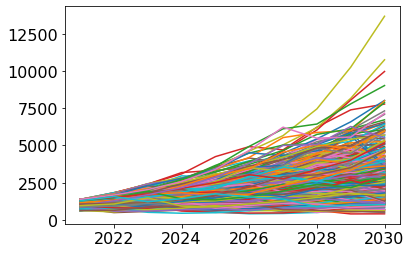

In [13]:
ax = results.plot.line()
ax.legend().set_visible(False)

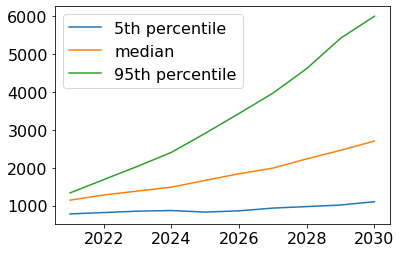

In [14]:
plot_df = pd.DataFrame({
    "5th percentile": results.quantile(0.05, axis=1),
    "median": results.quantile(0.5, axis=1),
    "95th percentile": results.quantile(0.95, axis=1),
})
plot_df.plot.line()

# Part 2: stacked/clustered bar plots

#### Question: In what decades were the Pacer fire hydrants mostly installed in Madison?

In [15]:
df = pd.read_csv("Fire_Hydrants.csv")
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


In [16]:
df[["Style", "year_manufactured"]]

,Style,year_manufactured
0,Pacer,1996.0
1,Pacer,1995.0
2,Pacer,1996.0
3,Pacer,1995.0
4,Pacer,1996.0
...,...,...
10104,NaN,2018.0
10105,NaN,2017.0
10106,NaN,2000.0
10107,NaN,2017.0


In [17]:
df = df[~df["year_manufactured"].isna()]
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


In [18]:
df["Style"]

0        Pacer
1        Pacer
2        Pacer
3        Pacer
4        Pacer
         ...  
10102      NaN
10104      NaN
10105      NaN
10106      NaN
10107      NaN
Name: Style, Length: 7256, dtype: object

In [19]:
df.groupby("Style").agg("count")["OBJECTID"].sort_values(ascending=False).head()

Style
Pacer      3101
Mueller    1209
M-3         550
WB-59       481
K-11        260
Name: OBJECTID, dtype: int64

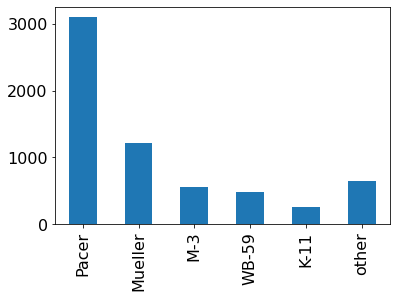

In [20]:
counts = df["Style"].value_counts()
top5 = counts[:5]
top5["other"] = counts[5:].sum()
top5.plot.bar()

In [21]:
df.loc[~df["Style"].isin(top5.index), "Style"] = "other"

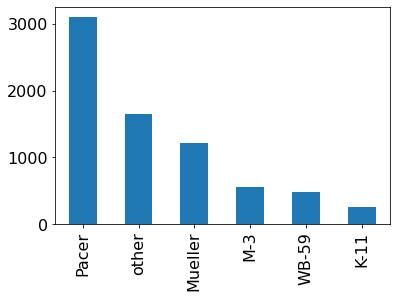

In [22]:
df["Style"].value_counts().plot.bar()

In [23]:
df["decade"] = (df["year_manufactured"] // 10 * 10).astype(int)

In [24]:
df = df[["decade", "Style", "OBJECTID"]]
df.head()

,decade,Style,OBJECTID
0,1990,Pacer,2536
1,1990,Pacer,2537
2,1990,Pacer,2538
3,1990,Pacer,2539
4,1990,Pacer,2540


In [25]:
counts = df.groupby(by=["decade", "Style"], as_index=False).agg("count")
counts.head()

,decade,Style,OBJECTID
0,1900,other,1
1,1930,M-3,8
2,1930,other,1
3,1940,M-3,68
4,1950,M-3,370


In [26]:
plot_df = counts.pivot(index="decade", columns="Style", values="OBJECTID").fillna(0)
plot_df.head()

Style,K-11,M-3,Mueller,Pacer,WB-59,other
decade,,,,,,
1900,0.0,0.0,0.0,0.0,0.0,1.0
1930,0.0,8.0,0.0,0.0,0.0,1.0
1940,0.0,68.0,0.0,0.0,0.0,0.0
1950,0.0,370.0,0.0,0.0,0.0,1.0
1960,46.0,98.0,0.0,1.0,101.0,104.0


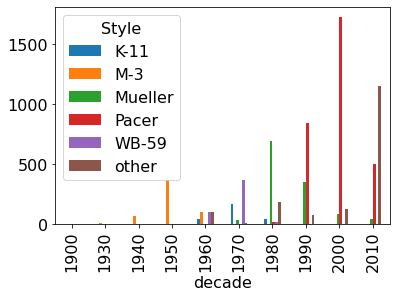

In [27]:
plot_df.plot.bar() # cluster (attempt 1)

In [28]:
# x-axis is quantitative (especially time): use line plot
# y-axis has categories that sum to a whole: stacked bar plot

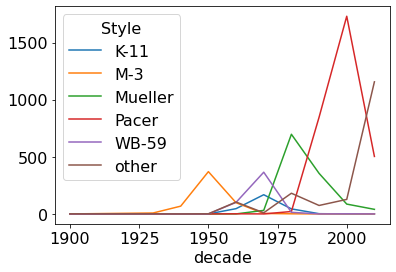

In [29]:
plot_df.plot.line()

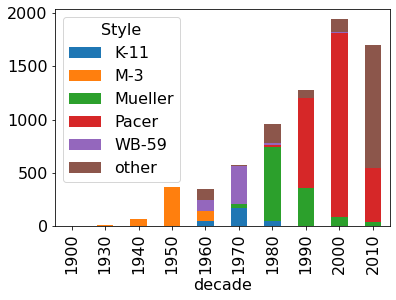

In [30]:
plot_df.plot.bar(stacked=True)